# CEREAL RATINGS: what's the scoop on health ratings?
#####  Audience: Non-Technical

# Introduction:
### The beloved American breakfast food - what is it about this part of a balanced breakfast that ranks high in consumer ratings?

#### What brands can we look to for highest ratings? What about lowest ratings? Is there an optimal point for a healthy sugary cereal? Do these factors play a part in product placement? 

Our dataset, acquired from Kaggle.com gives insight to the attributes and ratings of the cereal

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv(r'/Users/chaseweber/Desktop/Springboard/GitHub/Springboard/Cereal Analysis/cereal.csv')

In [3]:
# analyze columns
# df.info()

## WHAT CEREAL ATTRIBUTES ARE IN OUR DATA?
<b>name</b>: name of the cereal \
<b>mfr</b>: cereal manufacturer \
<b>type</b>: indicator of cold or hot cereal \
<b>calories</b>: calories per serving \
<b>protein</b>: grams of protein per serving \
<b>fat</b>: grams of fat per serving \
<b>sodium</b>: milligrams of sodium per serving \
<b>fiber</b>: grams of dietary fiber per serving \
<b>carbo</b>: grams of complex carbohydrates per serving \
<b>sugars</b>: grams of sugars per serving \
<b>potass</b>: milligrams of potassium per serving \
<b>vitamins</b>: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended per serving \
<b>shelf</b>: display shelf (1, 2, or 3, counting from the floor) \
<b>weight</b>: weight in ounces of one serving \
<b>cups</b>: number of cups in one serving \
<b>rating</b>: a rating of the cereals (Possibly from Consumer Reports?)

In [4]:
# replace manufacturing letters with names
df['mfr'].replace({'K' : 'Kelloggs', 'G' : 'General Mills', 'P' : 'Post', 'Q' : 'Quaker Oats', 'R':'Ralston Purina', 'N' : 'Nabisco', 'A' : 'American Home Food Products'}, inplace = True)

## HOW MANY CEREALS DOES EACH MANUFACTURER HAVE IN THIS DATASET?
### Out of curiosity, how many cereal manufacturers there are in our dataset? There are 7. The number of cereals produced by each manufacturer are shown below.

In [5]:
df['mfr'].value_counts()

Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: mfr, dtype: int64

### 45 of the 77 cereals (over half) in our dataset are manufactured by Kelloggs and General Mills.

## WHICH 5 CEREALS RECEIVED HIGHEST RATINGS?

In [6]:
print(df[['name', 'mfr', 'sugars', 'rating']].sort_values(['rating'], ascending = False).head(5))

                         name       mfr  sugars     rating
3   All-Bran with Extra Fiber  Kelloggs       0  93.704912
64     Shredded Wheat 'n'Bran   Nabisco       0  74.472949
65  Shredded Wheat spoon size   Nabisco       0  72.801787
0                   100% Bran   Nabisco       6  68.402973
63             Shredded Wheat   Nabisco       0  68.235885


### Our top 5 health ratings come at no surprise: All-Bran with Extra Fiber, Shredded Wheat 'n' Bran, Shredded Wheat spoon size, 100% Bran, Shredded Wheat. 
### Notice, Nabisco only held 6 cereals in our dataset, 4 of them are in the top 5 rating!

## HOW ABOUT 5 CEREALS WITH LOWEST RATINGS?

In [7]:
print(df[['name', 'mfr', 'sugars', 'rating']].sort_values(['rating']).head(5))
print(df['sugars'].max())

                     name            mfr  sugars     rating
10           Cap'n'Crunch    Quaker Oats      12  18.042851
12  Cinnamon Toast Crunch  General Mills       9  19.823573
35       Honey Graham Ohs    Quaker Oats      11  21.871292
18          Count Chocula  General Mills      13  22.396513
14            Cocoa Puffs  General Mills      13  22.736446
15


### SUGAR OVERLOAD! Our lowest ratings appear to include the most sugar-filled options. (The maximum sugars per serving is 15)
#### These cereals are manufactured mostly by General Mills. Recall, General Mills has 22 cereals in our dataset, do they have any cereals with high ratings?

## General Mills, do they exclusively produce low rated cereal?

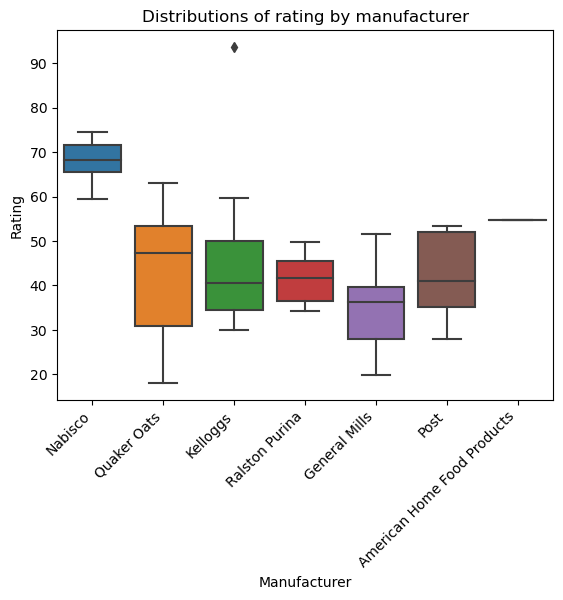

In [8]:
sns.boxplot(data = df, x = 'mfr', y = 'rating')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Rating')
plt.title('Distributions of rating by manufacturer')
plt.show()

### The chart above shows distribution of rating for each manufacturer; the middle line indicates the median rating.
### To answer our above question: YES - even with 16 more cereals in our dataset than Nabisco, General Mills' health ratings are consistantly lower.  
#### Notice, General Mills' boxplot (purple) does not overlap with that of Nabisco (blue). 
#### The widest spread occurs with Quaker Oats (orange). (Kellogs (green) if you include their outlier).

## Sure, General Mills maintains low ratings, but what about sugar, calories, and cups per serving?

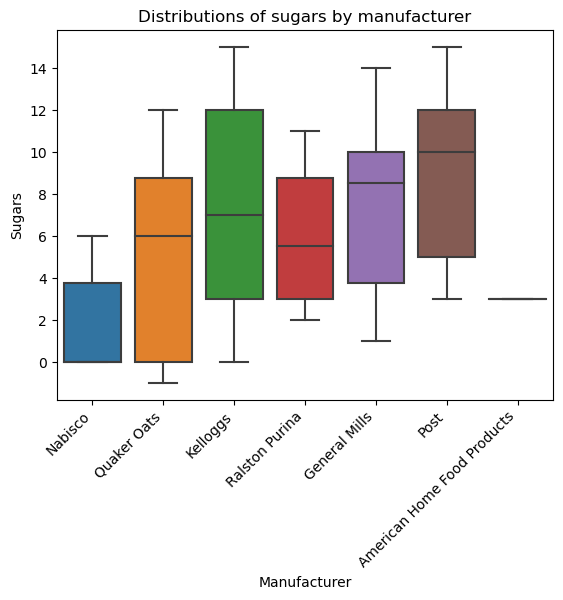

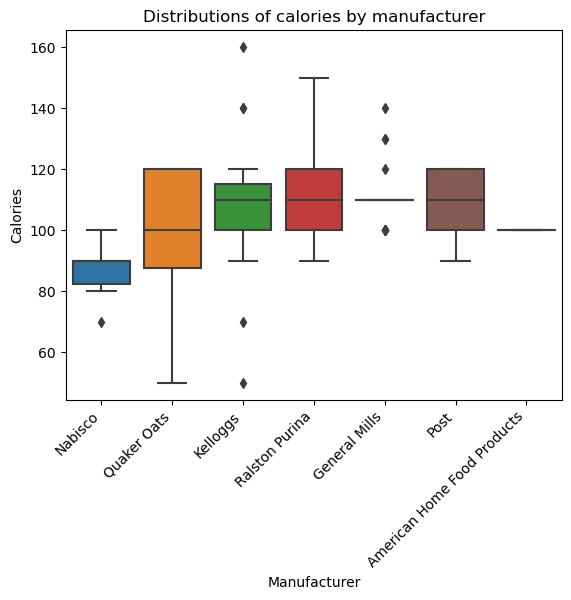

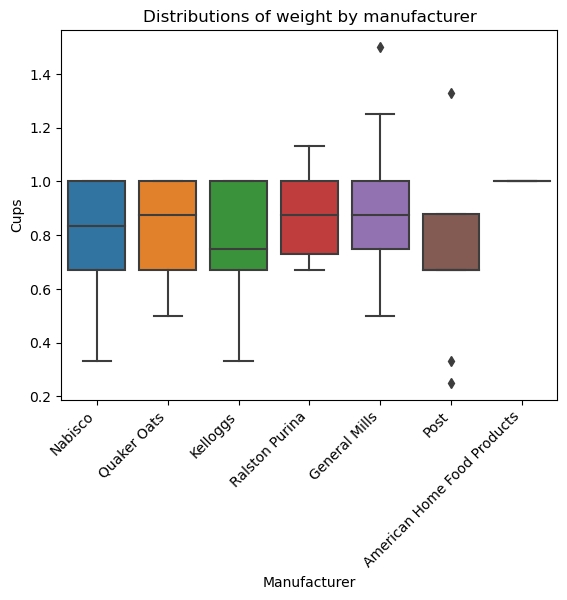

In [9]:
# plot manufacturer by surgar content
sns.boxplot(data = df, x = 'mfr', y = 'sugars')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Sugars')
plt.title('Distributions of sugars by manufacturer')
plt.show()

# plot manufacturer by calories per serving
sns.boxplot(data = df, x = 'mfr', y = 'calories')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.title('Distributions of calories by manufacturer')
plt.show()

# plot manufacturer by cups per serving
sns.boxplot(data = df, x = 'mfr', y = 'cups')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Cups')
plt.title('Distributions of weight by manufacturer')
plt.show()

### Spread-out sugar, consistant calories, and stererotypical serving size!
#### Interesting, General Mills (purple) cereals have a wide spread of sugar while calories per serving appears to be set at 100. As expeected, Nabisco (blue) cereals with their high health ratings, tend to have less sugar and calories per serving.
#### Most cereals appear to have a serving less than 1 cup. 
#### Post has the highest median sugar content, none of their cereals appeared in the lowest 5 ratings. Could we find a sweet spot between tasty and healthy here?

# Can I find a healthy, sugary cereal?

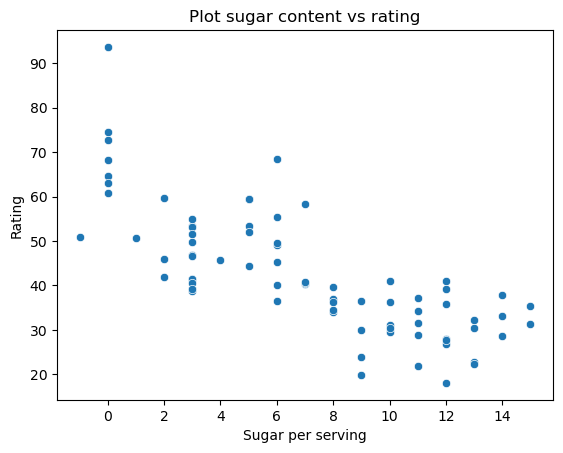

In [10]:
sns.scatterplot(data = df, x = 'sugars', y = 'rating')
plt.title('Plot sugar content vs rating')
plt.xlabel('Sugar per serving')
plt.ylabel('Rating')
plt.show()

### As seen in the plot above, as sugar per serving increases, ratings decrease.
### Unfortunately, there are no sugary cereals (sugar above 8 grams per serving) with a rating above 50.

## Can we optimize? A somewhat high health rating, high sugar, and low calorie?

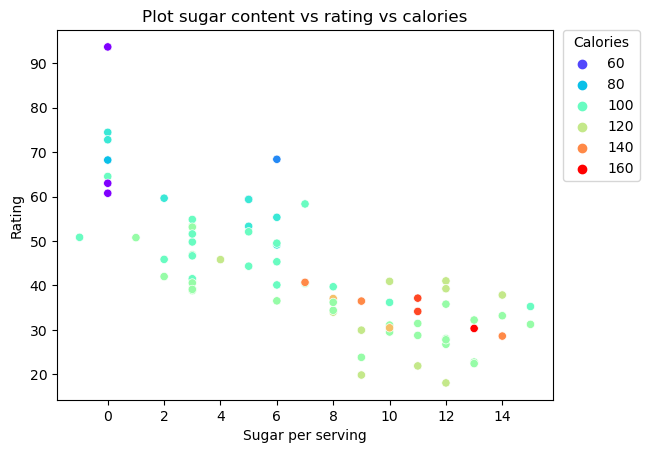

In [11]:
sns.scatterplot(data = df, x = 'sugars', y = 'rating', hue = 'calories', palette = 'rainbow')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Calories')
plt.title('Plot sugar content vs rating vs calories')
plt.xlabel('Sugar per serving')
plt.ylabel('Rating')
plt.show()

### The plot above mimics our initial scatter plot, now we add color to indicate how many calories are in a serving.
### There is one point that has 7 grams of sugar per serving, has a rating above 50, and is 100 calories. Which ceral is this?

In [12]:
optim_cereal = df[(df['sugars'] == 7) & (df['rating'] > 50)]
print(optim_cereal)

                   name       mfr type  calories  protein  fat  sodium  fiber  \
26  Frosted Mini-Wheats  Kelloggs    C       100        3    0       0    3.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
26   14.0       7     100        25      2     1.0   0.8  58.345141  


### Our winner - Kellogg's Frosted Mini-Wheats - perhaps we expected this ceral to have less sugar!

# Let's dip our spoons elsewhere
## Where does shelf placement fall into all of this?

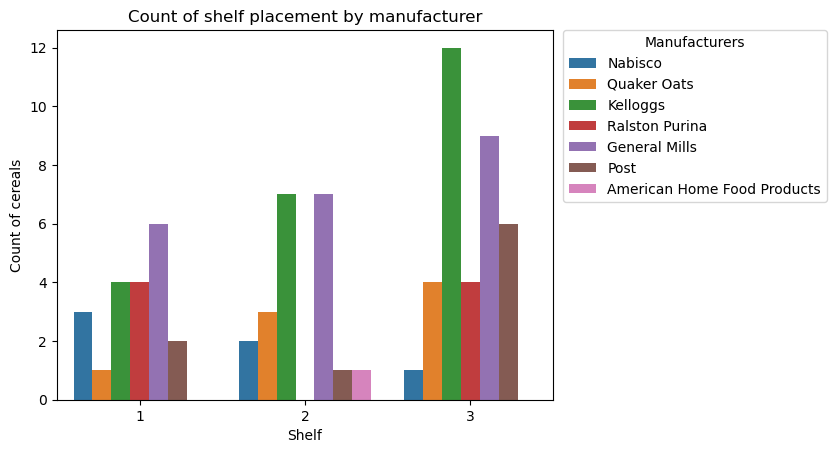

In [13]:
# plot count of cereal by manufacturer and shelf location
sns.countplot(data = df, x = 'shelf', hue = 'mfr')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Manufacturers')
plt.title('Count of shelf placement by manufacturer')
plt.xlabel('Shelf')
plt.ylabel('Count of cereals')
plt.show()

### The above plot shows counts of shelf placement by manufacturer.
### The third shelf has more cereals in general.
#### Most of Nabisco cereal (blue) is located on the first shelf.
#### All other cereals stay about the same or increase between 1st and 3rd shelves. 

## Does sugar and rating play a part in shelf placement?

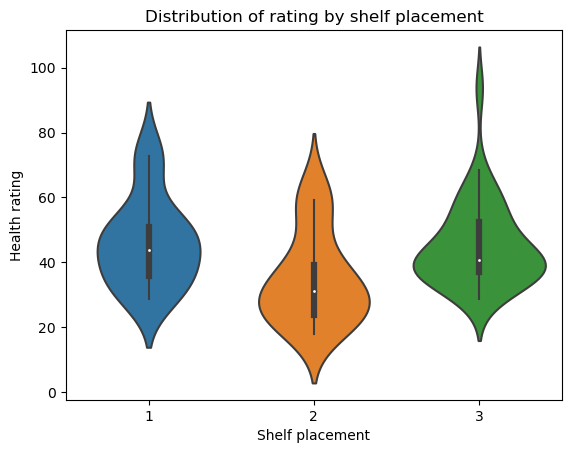

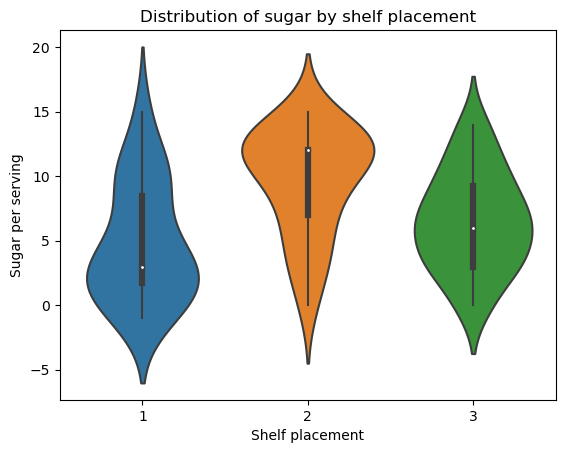

In [14]:
# violin plot of rating distribution by shelf
sns.violinplot(data = df, x = 'shelf', y = 'rating')
plt.title("Distribution of rating by shelf placement")
plt.xlabel('Shelf placement')
plt.ylabel('Health rating')
plt.show()

# violin plot of sugar distribution by shelf
sns.violinplot(data = df, x = 'shelf', y = 'sugars')
plt.title("Distribution of sugar by shelf placement")
plt.xlabel('Shelf placement')
plt.ylabel('Sugar per serving')
plt.show()

### Our violin plots above show distribution of rating and sugar by shelf placement. Bulges indicated where there is more data.
### Interesting trends here! The 3rd shelf (green) appears to be un-affected by health rating and sugar.
#### High rated cereals are not placed on the 2nd shelf, while the sugar-packed counter-parts are filling the 2nd shelf. 
#### As an additional visual, check out this scatter plot below. Notice the clump of shelf 1 in the top left corner and the clump of shelf 2 in the bottom right:

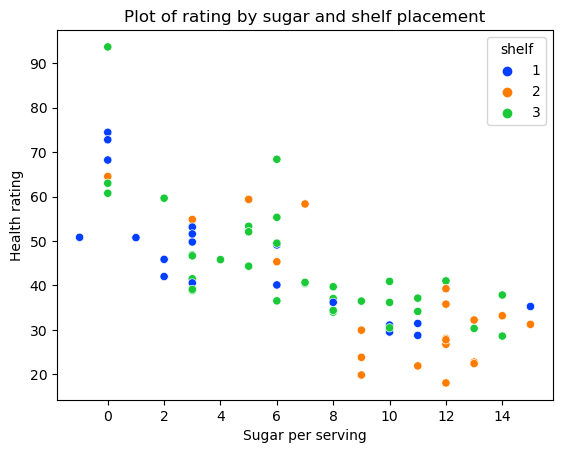

In [15]:
i = "sugars"
j = "rating"

sns.scatterplot(data = df, x = 'sugars', y = 'rating', hue = 'shelf', palette = 'bright')
plt.title("Plot of rating by sugar and shelf placement")
plt.xlabel('Sugar per serving')
plt.ylabel('Health rating')
plt.show()

# Key Findings

### 1. If you are looking for a healthy cereal option, Nabisco cereals are your safest bet.
### 2. There are no cereals with high sugar content and high health ratings.
### 3. The 2nd shelf mostly contains sugary cereals.

## Next Steps:
#### For further investigation, an understanding of the exact criteria for the health ratings would be useful; who made the ratings? what exactly are they based on? when did these ratings take place? where were ratings gathered? why were these ratings accepted? 

# APPENDIX:

### Below is a correlation chart - correlation is NOT causation. 
#### Correlation shows how related two numeric factors are. The closer to 1 a number is, the more positively related two factors are. The closer to -1 a number is, the more negatively related two factors are. 
#### For additional help, check for values that are filled with a darker color. 

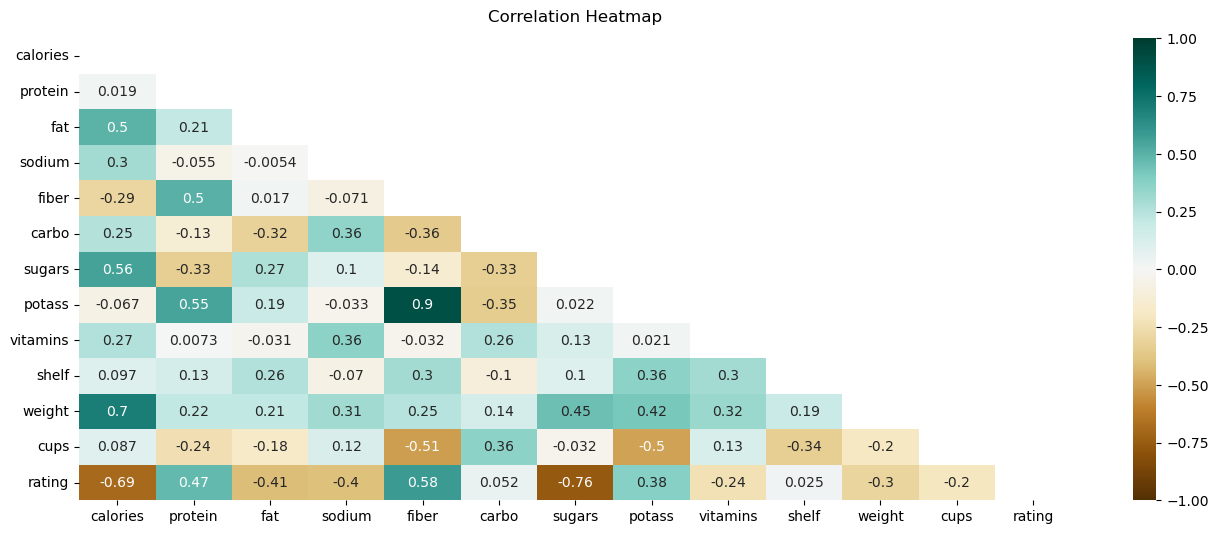

In [16]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, mask = mask, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### From the above table we find some interesting correlations:

#### potassium ~ fiber .9
#### sugars ~ rating -.76 
#### weight ~ calories .7 
#### calories ~ rating -.69 
#### fiber ~ rating .58 
#### sugars ~ calories .56

### Scatter plots of variables of interest:

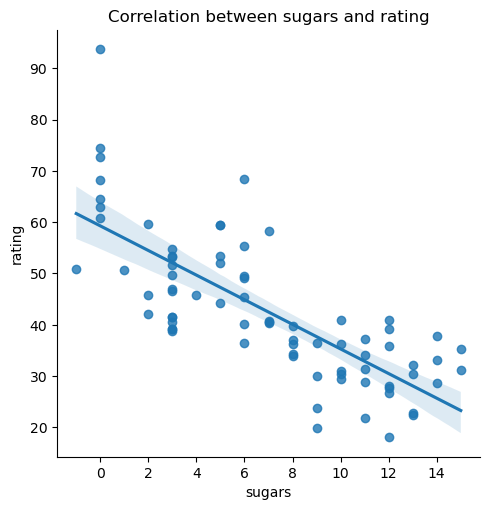

In [17]:
i = "sugars"
j = "rating"

sns.lmplot(data = df, x = i, y = j)
plt.title("Correlation between " + i + " and " + j)
plt.show()

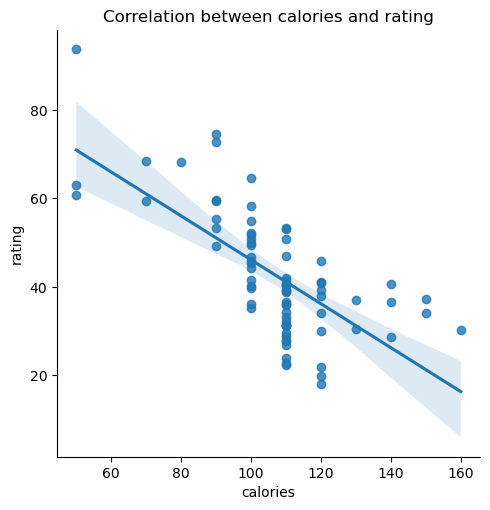

In [18]:
i = "calories"
j = "rating"

sns.lmplot(data = df, x = i, y = j)
plt.title("Correlation between " + i + " and " + j)
plt.show()

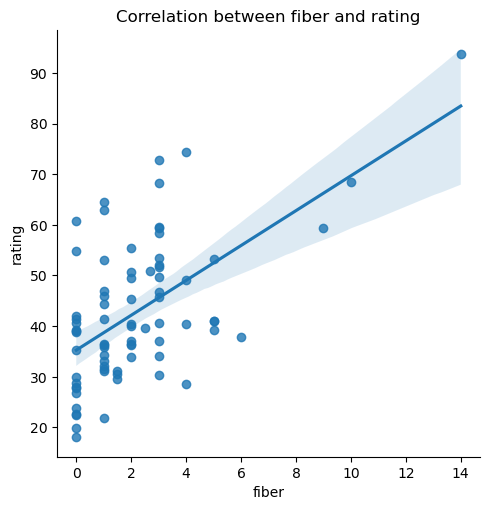

In [19]:
i = "fiber"
j = "rating"

sns.lmplot(data = df, x = i, y = j)
plt.title("Correlation between " + i + " and " + j)
plt.show()